
#Installation
---



In [15]:
!pip install pyarrow

In [16]:
from pathlib import Path
import os
from datetime import date
import re

In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import dask.dataframe as dd
pd.options.mode.chained_assignment = None

In [50]:
# Paths
p = Path('Z:\FFE')
pathShapefile = Path(p / 'shapefile')
pathParquets = Path(p / 'output')

print(len(os.listdir(pathParquets)))

3000


In [99]:
def get_list_pids(path=pathParquets):
    pidList = []
    updtScenariolist = []
    files = pathParquets.glob('*.parquet')
    for file in files:
        regex = r"pid\d*"
        pidNames = re.findall(regex, str(file))
        for pidName in pidNames:
          print(f" file pid {pidName}")
          pidList.append(pidName)
    pidList = list(set(pidList))
    updtScenariolist = np.arange(0, 3000, 300).tolist()
    return pidList, updtScenariolist


def read_and_concatenate_parquets(pidList,incrList,path=pathParquets):
    L = []
    for idx, val in enumerate(pidList):
        files = pathParquets.glob('*'+str(val)+'.parquet')
        for file in files:
            print(file)
            pqt = pd.read_parquet(file, engine='pyarrow')
            pqt['scenario']=pqt['scenario']+incrList[idx]
#             print(pqt.head())
            L.append(pqt)
            print(len(L))
    df = dd.concat(L)
    return df

    
def count_fid_occurences(df):
    df.drop_duplicates(subset=['scenario', 'source'], inplace = True) 
    count_df = df['source'].value_counts().compute()
    count_df = pd.DataFrame({'source': count_df.index, 'count': count_df.values})
    count_df.to_parquet(str(pathShapefile) + '/' + f'CountBurn-{str(date.today())}.parquet', 
                        engine='auto', compression="GZIP")# could be datetime.now
    return count_df


def Merge(countDf,nameShapefile):
  # Shapefile
    gdfShape = gpd.read_file(pathShapefile / nameShapefile)
    gdfShape.insert(0, 'FID', range(0, len(gdfShape)))
    gdfShape.rename(columns={'FID': 'source'}, inplace=True)
    gdfShape = gdfShape[['source', 'geometry']]
    countDf.index.name = None
    merged = countDf.merge(gdfShape, on=['source'], how='left')
    return merged


def createShapefile(df):
  # df = df.to_pandas()
  gdf = gpd.GeoDataFrame(df, geometry='geometry')
  # gdf.plot(column='count', cmap='hsv', legend=True)
  gdf.to_file(os.path.join(str(pathShapefile) + "/" + "Burn3000scenarioWellington.shp"))
  return gdf

In [84]:
pids, incr = get_list_pids()

 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367


 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367
 file pid pid257146
 file pid pid257147
 file pid pid257148
 file pid pid257149
 file pid pid257150
 file pid pid266363
 file pid pid266364
 file pid pid266365
 file pid pid266366
 file pid pid266367


In [88]:
%%time
concatDf = read_and_concatenate_parquets(pidList=pids,incrList=incr)

Z:\FFE\output\scenario0_pid266365.parquet
1
Z:\FFE\output\scenario100_pid266365.parquet
2
Z:\FFE\output\scenario101_pid266365.parquet
3
Z:\FFE\output\scenario102_pid266365.parquet
4
Z:\FFE\output\scenario103_pid266365.parquet
5
Z:\FFE\output\scenario104_pid266365.parquet
6
Z:\FFE\output\scenario105_pid266365.parquet
7
Z:\FFE\output\scenario106_pid266365.parquet
8
Z:\FFE\output\scenario107_pid266365.parquet
9
Z:\FFE\output\scenario108_pid266365.parquet
10
Z:\FFE\output\scenario109_pid266365.parquet
11
Z:\FFE\output\scenario10_pid266365.parquet
12
Z:\FFE\output\scenario110_pid266365.parquet
13
Z:\FFE\output\scenario111_pid266365.parquet
14
Z:\FFE\output\scenario112_pid266365.parquet
15
Z:\FFE\output\scenario113_pid266365.parquet
16
Z:\FFE\output\scenario114_pid266365.parquet
17
Z:\FFE\output\scenario115_pid266365.parquet
18
Z:\FFE\output\scenario116_pid266365.parquet
19
Z:\FFE\output\scenario117_pid266365.parquet
20
Z:\FFE\output\scenario118_pid266365.parquet
21
Z:\FFE\output\scenario119

176
Z:\FFE\output\scenario259_pid266365.parquet
177
Z:\FFE\output\scenario25_pid266365.parquet
178
Z:\FFE\output\scenario260_pid266365.parquet
179
Z:\FFE\output\scenario261_pid266365.parquet
180
Z:\FFE\output\scenario262_pid266365.parquet
181
Z:\FFE\output\scenario263_pid266365.parquet
182
Z:\FFE\output\scenario264_pid266365.parquet
183
Z:\FFE\output\scenario265_pid266365.parquet
184
Z:\FFE\output\scenario266_pid266365.parquet
185
Z:\FFE\output\scenario267_pid266365.parquet
186
Z:\FFE\output\scenario268_pid266365.parquet
187
Z:\FFE\output\scenario269_pid266365.parquet
188
Z:\FFE\output\scenario26_pid266365.parquet
189
Z:\FFE\output\scenario270_pid266365.parquet
190
Z:\FFE\output\scenario271_pid266365.parquet
191
Z:\FFE\output\scenario272_pid266365.parquet
192
Z:\FFE\output\scenario273_pid266365.parquet
193
Z:\FFE\output\scenario274_pid266365.parquet
194
Z:\FFE\output\scenario275_pid266365.parquet
195
Z:\FFE\output\scenario276_pid266365.parquet
196
Z:\FFE\output\scenario277_pid266365.pa

350
Z:\FFE\output\scenario145_pid266366.parquet
351
Z:\FFE\output\scenario146_pid266366.parquet
352
Z:\FFE\output\scenario147_pid266366.parquet
353
Z:\FFE\output\scenario148_pid266366.parquet
354
Z:\FFE\output\scenario149_pid266366.parquet
355
Z:\FFE\output\scenario14_pid266366.parquet
356
Z:\FFE\output\scenario150_pid266366.parquet
357
Z:\FFE\output\scenario151_pid266366.parquet
358
Z:\FFE\output\scenario152_pid266366.parquet
359
Z:\FFE\output\scenario153_pid266366.parquet
360
Z:\FFE\output\scenario154_pid266366.parquet
361
Z:\FFE\output\scenario155_pid266366.parquet
362
Z:\FFE\output\scenario156_pid266366.parquet
363
Z:\FFE\output\scenario157_pid266366.parquet
364
Z:\FFE\output\scenario158_pid266366.parquet
365
Z:\FFE\output\scenario159_pid266366.parquet
366
Z:\FFE\output\scenario15_pid266366.parquet
367
Z:\FFE\output\scenario160_pid266366.parquet
368
Z:\FFE\output\scenario161_pid266366.parquet
369
Z:\FFE\output\scenario162_pid266366.parquet
370
Z:\FFE\output\scenario163_pid266366.pa

521
Z:\FFE\output\scenario29_pid266366.parquet
522
Z:\FFE\output\scenario2_pid266366.parquet
523
Z:\FFE\output\scenario30_pid266366.parquet
524
Z:\FFE\output\scenario31_pid266366.parquet
525
Z:\FFE\output\scenario32_pid266366.parquet
526
Z:\FFE\output\scenario33_pid266366.parquet
527
Z:\FFE\output\scenario34_pid266366.parquet
528
Z:\FFE\output\scenario35_pid266366.parquet
529
Z:\FFE\output\scenario36_pid266366.parquet
530
Z:\FFE\output\scenario37_pid266366.parquet
531
Z:\FFE\output\scenario38_pid266366.parquet
532
Z:\FFE\output\scenario39_pid266366.parquet
533
Z:\FFE\output\scenario3_pid266366.parquet
534
Z:\FFE\output\scenario40_pid266366.parquet
535
Z:\FFE\output\scenario41_pid266366.parquet
536
Z:\FFE\output\scenario42_pid266366.parquet
537
Z:\FFE\output\scenario43_pid266366.parquet
538
Z:\FFE\output\scenario44_pid266366.parquet
539
Z:\FFE\output\scenario45_pid266366.parquet
540
Z:\FFE\output\scenario46_pid266366.parquet
541
Z:\FFE\output\scenario47_pid266366.parquet
542
Z:\FFE\outp

694
Z:\FFE\output\scenario185_pid257150.parquet
695
Z:\FFE\output\scenario186_pid257150.parquet
696
Z:\FFE\output\scenario187_pid257150.parquet
697
Z:\FFE\output\scenario188_pid257150.parquet
698
Z:\FFE\output\scenario189_pid257150.parquet
699
Z:\FFE\output\scenario18_pid257150.parquet
700
Z:\FFE\output\scenario190_pid257150.parquet
701
Z:\FFE\output\scenario191_pid257150.parquet
702
Z:\FFE\output\scenario192_pid257150.parquet
703
Z:\FFE\output\scenario193_pid257150.parquet
704
Z:\FFE\output\scenario194_pid257150.parquet
705
Z:\FFE\output\scenario195_pid257150.parquet
706
Z:\FFE\output\scenario196_pid257150.parquet
707
Z:\FFE\output\scenario197_pid257150.parquet
708
Z:\FFE\output\scenario198_pid257150.parquet
709
Z:\FFE\output\scenario199_pid257150.parquet
710
Z:\FFE\output\scenario19_pid257150.parquet
711
Z:\FFE\output\scenario1_pid257150.parquet
712
Z:\FFE\output\scenario200_pid257150.parquet
713
Z:\FFE\output\scenario201_pid257150.parquet
714
Z:\FFE\output\scenario202_pid257150.parq

866
Z:\FFE\output\scenario6_pid257150.parquet
867
Z:\FFE\output\scenario70_pid257150.parquet
868
Z:\FFE\output\scenario71_pid257150.parquet
869
Z:\FFE\output\scenario72_pid257150.parquet
870
Z:\FFE\output\scenario73_pid257150.parquet
871
Z:\FFE\output\scenario74_pid257150.parquet
872
Z:\FFE\output\scenario75_pid257150.parquet
873
Z:\FFE\output\scenario76_pid257150.parquet
874
Z:\FFE\output\scenario77_pid257150.parquet
875
Z:\FFE\output\scenario78_pid257150.parquet
876
Z:\FFE\output\scenario79_pid257150.parquet
877
Z:\FFE\output\scenario7_pid257150.parquet
878
Z:\FFE\output\scenario80_pid257150.parquet
879
Z:\FFE\output\scenario81_pid257150.parquet
880
Z:\FFE\output\scenario82_pid257150.parquet
881
Z:\FFE\output\scenario83_pid257150.parquet
882
Z:\FFE\output\scenario84_pid257150.parquet
883
Z:\FFE\output\scenario85_pid257150.parquet
884
Z:\FFE\output\scenario86_pid257150.parquet
885
Z:\FFE\output\scenario87_pid257150.parquet
886
Z:\FFE\output\scenario88_pid257150.parquet
887
Z:\FFE\outp

1038
Z:\FFE\output\scenario224_pid257146.parquet
1039
Z:\FFE\output\scenario225_pid257146.parquet
1040
Z:\FFE\output\scenario226_pid257146.parquet
1041
Z:\FFE\output\scenario227_pid257146.parquet
1042
Z:\FFE\output\scenario228_pid257146.parquet
1043
Z:\FFE\output\scenario229_pid257146.parquet
1044
Z:\FFE\output\scenario22_pid257146.parquet
1045
Z:\FFE\output\scenario230_pid257146.parquet
1046
Z:\FFE\output\scenario231_pid257146.parquet
1047
Z:\FFE\output\scenario232_pid257146.parquet
1048
Z:\FFE\output\scenario233_pid257146.parquet
1049
Z:\FFE\output\scenario234_pid257146.parquet
1050
Z:\FFE\output\scenario235_pid257146.parquet
1051
Z:\FFE\output\scenario236_pid257146.parquet
1052
Z:\FFE\output\scenario237_pid257146.parquet
1053
Z:\FFE\output\scenario238_pid257146.parquet
1054
Z:\FFE\output\scenario239_pid257146.parquet
1055
Z:\FFE\output\scenario23_pid257146.parquet
1056
Z:\FFE\output\scenario240_pid257146.parquet
1057
Z:\FFE\output\scenario241_pid257146.parquet
1058
Z:\FFE\output\sce

1210
Z:\FFE\output\scenario109_pid266363.parquet
1211
Z:\FFE\output\scenario10_pid266363.parquet
1212
Z:\FFE\output\scenario110_pid266363.parquet
1213
Z:\FFE\output\scenario111_pid266363.parquet
1214
Z:\FFE\output\scenario112_pid266363.parquet
1215
Z:\FFE\output\scenario113_pid266363.parquet
1216
Z:\FFE\output\scenario114_pid266363.parquet
1217
Z:\FFE\output\scenario115_pid266363.parquet
1218
Z:\FFE\output\scenario116_pid266363.parquet
1219
Z:\FFE\output\scenario117_pid266363.parquet
1220
Z:\FFE\output\scenario118_pid266363.parquet
1221
Z:\FFE\output\scenario119_pid266363.parquet
1222
Z:\FFE\output\scenario11_pid266363.parquet
1223
Z:\FFE\output\scenario120_pid266363.parquet
1224
Z:\FFE\output\scenario121_pid266363.parquet
1225
Z:\FFE\output\scenario122_pid266363.parquet
1226
Z:\FFE\output\scenario123_pid266363.parquet
1227
Z:\FFE\output\scenario124_pid266363.parquet
1228
Z:\FFE\output\scenario125_pid266363.parquet
1229
Z:\FFE\output\scenario126_pid266363.parquet
1230
Z:\FFE\output\sce

1380
Z:\FFE\output\scenario262_pid266363.parquet
1381
Z:\FFE\output\scenario263_pid266363.parquet
1382
Z:\FFE\output\scenario264_pid266363.parquet
1383
Z:\FFE\output\scenario265_pid266363.parquet
1384
Z:\FFE\output\scenario266_pid266363.parquet
1385
Z:\FFE\output\scenario267_pid266363.parquet
1386
Z:\FFE\output\scenario268_pid266363.parquet
1387
Z:\FFE\output\scenario269_pid266363.parquet
1388
Z:\FFE\output\scenario26_pid266363.parquet
1389
Z:\FFE\output\scenario270_pid266363.parquet
1390
Z:\FFE\output\scenario271_pid266363.parquet
1391
Z:\FFE\output\scenario272_pid266363.parquet
1392
Z:\FFE\output\scenario273_pid266363.parquet
1393
Z:\FFE\output\scenario274_pid266363.parquet
1394
Z:\FFE\output\scenario275_pid266363.parquet
1395
Z:\FFE\output\scenario276_pid266363.parquet
1396
Z:\FFE\output\scenario277_pid266363.parquet
1397
Z:\FFE\output\scenario278_pid266363.parquet
1398
Z:\FFE\output\scenario279_pid266363.parquet
1399
Z:\FFE\output\scenario27_pid266363.parquet
1400
Z:\FFE\output\sce

1551
Z:\FFE\output\scenario146_pid257147.parquet
1552
Z:\FFE\output\scenario147_pid257147.parquet
1553
Z:\FFE\output\scenario148_pid257147.parquet
1554
Z:\FFE\output\scenario149_pid257147.parquet
1555
Z:\FFE\output\scenario14_pid257147.parquet
1556
Z:\FFE\output\scenario150_pid257147.parquet
1557
Z:\FFE\output\scenario151_pid257147.parquet
1558
Z:\FFE\output\scenario152_pid257147.parquet
1559
Z:\FFE\output\scenario153_pid257147.parquet
1560
Z:\FFE\output\scenario154_pid257147.parquet
1561
Z:\FFE\output\scenario155_pid257147.parquet
1562
Z:\FFE\output\scenario156_pid257147.parquet
1563
Z:\FFE\output\scenario157_pid257147.parquet
1564
Z:\FFE\output\scenario158_pid257147.parquet
1565
Z:\FFE\output\scenario159_pid257147.parquet
1566
Z:\FFE\output\scenario15_pid257147.parquet
1567
Z:\FFE\output\scenario160_pid257147.parquet
1568
Z:\FFE\output\scenario161_pid257147.parquet
1569
Z:\FFE\output\scenario162_pid257147.parquet
1570
Z:\FFE\output\scenario163_pid257147.parquet
1571
Z:\FFE\output\sce

1722
Z:\FFE\output\scenario2_pid257147.parquet
1723
Z:\FFE\output\scenario30_pid257147.parquet
1724
Z:\FFE\output\scenario31_pid257147.parquet
1725
Z:\FFE\output\scenario32_pid257147.parquet
1726
Z:\FFE\output\scenario33_pid257147.parquet
1727
Z:\FFE\output\scenario34_pid257147.parquet
1728
Z:\FFE\output\scenario35_pid257147.parquet
1729
Z:\FFE\output\scenario36_pid257147.parquet
1730
Z:\FFE\output\scenario37_pid257147.parquet
1731
Z:\FFE\output\scenario38_pid257147.parquet
1732
Z:\FFE\output\scenario39_pid257147.parquet
1733
Z:\FFE\output\scenario3_pid257147.parquet
1734
Z:\FFE\output\scenario40_pid257147.parquet
1735
Z:\FFE\output\scenario41_pid257147.parquet
1736
Z:\FFE\output\scenario42_pid257147.parquet
1737
Z:\FFE\output\scenario43_pid257147.parquet
1738
Z:\FFE\output\scenario44_pid257147.parquet
1739
Z:\FFE\output\scenario45_pid257147.parquet
1740
Z:\FFE\output\scenario46_pid257147.parquet
1741
Z:\FFE\output\scenario47_pid257147.parquet
1742
Z:\FFE\output\scenario48_pid257147.pa

1896
Z:\FFE\output\scenario187_pid257148.parquet
1897
Z:\FFE\output\scenario188_pid257148.parquet
1898
Z:\FFE\output\scenario189_pid257148.parquet
1899
Z:\FFE\output\scenario18_pid257148.parquet
1900
Z:\FFE\output\scenario190_pid257148.parquet
1901
Z:\FFE\output\scenario191_pid257148.parquet
1902
Z:\FFE\output\scenario192_pid257148.parquet
1903
Z:\FFE\output\scenario193_pid257148.parquet
1904
Z:\FFE\output\scenario194_pid257148.parquet
1905
Z:\FFE\output\scenario195_pid257148.parquet
1906
Z:\FFE\output\scenario196_pid257148.parquet
1907
Z:\FFE\output\scenario197_pid257148.parquet
1908
Z:\FFE\output\scenario198_pid257148.parquet
1909
Z:\FFE\output\scenario199_pid257148.parquet
1910
Z:\FFE\output\scenario19_pid257148.parquet
1911
Z:\FFE\output\scenario1_pid257148.parquet
1912
Z:\FFE\output\scenario200_pid257148.parquet
1913
Z:\FFE\output\scenario201_pid257148.parquet
1914
Z:\FFE\output\scenario202_pid257148.parquet
1915
Z:\FFE\output\scenario203_pid257148.parquet
1916
Z:\FFE\output\scena

2069
Z:\FFE\output\scenario72_pid257148.parquet
2070
Z:\FFE\output\scenario73_pid257148.parquet
2071
Z:\FFE\output\scenario74_pid257148.parquet
2072
Z:\FFE\output\scenario75_pid257148.parquet
2073
Z:\FFE\output\scenario76_pid257148.parquet
2074
Z:\FFE\output\scenario77_pid257148.parquet
2075
Z:\FFE\output\scenario78_pid257148.parquet
2076
Z:\FFE\output\scenario79_pid257148.parquet
2077
Z:\FFE\output\scenario7_pid257148.parquet
2078
Z:\FFE\output\scenario80_pid257148.parquet
2079
Z:\FFE\output\scenario81_pid257148.parquet
2080
Z:\FFE\output\scenario82_pid257148.parquet
2081
Z:\FFE\output\scenario83_pid257148.parquet
2082
Z:\FFE\output\scenario84_pid257148.parquet
2083
Z:\FFE\output\scenario85_pid257148.parquet
2084
Z:\FFE\output\scenario86_pid257148.parquet
2085
Z:\FFE\output\scenario87_pid257148.parquet
2086
Z:\FFE\output\scenario88_pid257148.parquet
2087
Z:\FFE\output\scenario89_pid257148.parquet
2088
Z:\FFE\output\scenario8_pid257148.parquet
2089
Z:\FFE\output\scenario90_pid257148.pa

2238
Z:\FFE\output\scenario224_pid266367.parquet
2239
Z:\FFE\output\scenario225_pid266367.parquet
2240
Z:\FFE\output\scenario226_pid266367.parquet
2241
Z:\FFE\output\scenario227_pid266367.parquet
2242
Z:\FFE\output\scenario228_pid266367.parquet
2243
Z:\FFE\output\scenario229_pid266367.parquet
2244
Z:\FFE\output\scenario22_pid266367.parquet
2245
Z:\FFE\output\scenario230_pid266367.parquet
2246
Z:\FFE\output\scenario231_pid266367.parquet
2247
Z:\FFE\output\scenario232_pid266367.parquet
2248
Z:\FFE\output\scenario233_pid266367.parquet
2249
Z:\FFE\output\scenario234_pid266367.parquet
2250
Z:\FFE\output\scenario235_pid266367.parquet
2251
Z:\FFE\output\scenario236_pid266367.parquet
2252
Z:\FFE\output\scenario237_pid266367.parquet
2253
Z:\FFE\output\scenario238_pid266367.parquet
2254
Z:\FFE\output\scenario239_pid266367.parquet
2255
Z:\FFE\output\scenario23_pid266367.parquet
2256
Z:\FFE\output\scenario240_pid266367.parquet
2257
Z:\FFE\output\scenario241_pid266367.parquet
2258
Z:\FFE\output\sce

2414
Z:\FFE\output\scenario112_pid257149.parquet
2415
Z:\FFE\output\scenario113_pid257149.parquet
2416
Z:\FFE\output\scenario114_pid257149.parquet
2417
Z:\FFE\output\scenario115_pid257149.parquet
2418
Z:\FFE\output\scenario116_pid257149.parquet
2419
Z:\FFE\output\scenario117_pid257149.parquet
2420
Z:\FFE\output\scenario118_pid257149.parquet
2421
Z:\FFE\output\scenario119_pid257149.parquet
2422
Z:\FFE\output\scenario11_pid257149.parquet
2423
Z:\FFE\output\scenario120_pid257149.parquet
2424
Z:\FFE\output\scenario121_pid257149.parquet
2425
Z:\FFE\output\scenario122_pid257149.parquet
2426
Z:\FFE\output\scenario123_pid257149.parquet
2427
Z:\FFE\output\scenario124_pid257149.parquet
2428
Z:\FFE\output\scenario125_pid257149.parquet
2429
Z:\FFE\output\scenario126_pid257149.parquet
2430
Z:\FFE\output\scenario127_pid257149.parquet
2431
Z:\FFE\output\scenario128_pid257149.parquet
2432
Z:\FFE\output\scenario129_pid257149.parquet
2433
Z:\FFE\output\scenario12_pid257149.parquet
2434
Z:\FFE\output\sce

2583
Z:\FFE\output\scenario265_pid257149.parquet
2584
Z:\FFE\output\scenario266_pid257149.parquet
2585
Z:\FFE\output\scenario267_pid257149.parquet
2586
Z:\FFE\output\scenario268_pid257149.parquet
2587
Z:\FFE\output\scenario269_pid257149.parquet
2588
Z:\FFE\output\scenario26_pid257149.parquet
2589
Z:\FFE\output\scenario270_pid257149.parquet
2590
Z:\FFE\output\scenario271_pid257149.parquet
2591
Z:\FFE\output\scenario272_pid257149.parquet
2592
Z:\FFE\output\scenario273_pid257149.parquet
2593
Z:\FFE\output\scenario274_pid257149.parquet
2594
Z:\FFE\output\scenario275_pid257149.parquet
2595
Z:\FFE\output\scenario276_pid257149.parquet
2596
Z:\FFE\output\scenario277_pid257149.parquet
2597
Z:\FFE\output\scenario278_pid257149.parquet
2598
Z:\FFE\output\scenario279_pid257149.parquet
2599
Z:\FFE\output\scenario27_pid257149.parquet
2600
Z:\FFE\output\scenario280_pid257149.parquet
2601
Z:\FFE\output\scenario281_pid257149.parquet
2602
Z:\FFE\output\scenario282_pid257149.parquet
2603
Z:\FFE\output\sce

2757
Z:\FFE\output\scenario151_pid266364.parquet
2758
Z:\FFE\output\scenario152_pid266364.parquet
2759
Z:\FFE\output\scenario153_pid266364.parquet
2760
Z:\FFE\output\scenario154_pid266364.parquet
2761
Z:\FFE\output\scenario155_pid266364.parquet
2762
Z:\FFE\output\scenario156_pid266364.parquet
2763
Z:\FFE\output\scenario157_pid266364.parquet
2764
Z:\FFE\output\scenario158_pid266364.parquet
2765
Z:\FFE\output\scenario159_pid266364.parquet
2766
Z:\FFE\output\scenario15_pid266364.parquet
2767
Z:\FFE\output\scenario160_pid266364.parquet
2768
Z:\FFE\output\scenario161_pid266364.parquet
2769
Z:\FFE\output\scenario162_pid266364.parquet
2770
Z:\FFE\output\scenario163_pid266364.parquet
2771
Z:\FFE\output\scenario164_pid266364.parquet
2772
Z:\FFE\output\scenario165_pid266364.parquet
2773
Z:\FFE\output\scenario166_pid266364.parquet
2774
Z:\FFE\output\scenario167_pid266364.parquet
2775
Z:\FFE\output\scenario168_pid266364.parquet
2776
Z:\FFE\output\scenario169_pid266364.parquet
2777
Z:\FFE\output\sc

2928
Z:\FFE\output\scenario35_pid266364.parquet
2929
Z:\FFE\output\scenario36_pid266364.parquet
2930
Z:\FFE\output\scenario37_pid266364.parquet
2931
Z:\FFE\output\scenario38_pid266364.parquet
2932
Z:\FFE\output\scenario39_pid266364.parquet
2933
Z:\FFE\output\scenario3_pid266364.parquet
2934
Z:\FFE\output\scenario40_pid266364.parquet
2935
Z:\FFE\output\scenario41_pid266364.parquet
2936
Z:\FFE\output\scenario42_pid266364.parquet
2937
Z:\FFE\output\scenario43_pid266364.parquet
2938
Z:\FFE\output\scenario44_pid266364.parquet
2939
Z:\FFE\output\scenario45_pid266364.parquet
2940
Z:\FFE\output\scenario46_pid266364.parquet
2941
Z:\FFE\output\scenario47_pid266364.parquet
2942
Z:\FFE\output\scenario48_pid266364.parquet
2943
Z:\FFE\output\scenario49_pid266364.parquet
2944
Z:\FFE\output\scenario4_pid266364.parquet
2945
Z:\FFE\output\scenario50_pid266364.parquet
2946
Z:\FFE\output\scenario51_pid266364.parquet
2947
Z:\FFE\output\scenario52_pid266364.parquet
2948
Z:\FFE\output\scenario53_pid266364.pa

In [ ]:
concatDf.drop_duplicates(['scenario', 'source'])

In [100]:
%%time
countConcatDf = count_fid_occurences(concatDf)

Wall time: 6.44 s


,source,count
0,68481,10396
1,66370,9415
2,37666,9387
3,31601,9119
4,1690,9061
...,...,...
69212,38218,1
69213,60394,1
69214,5581,1
69215,26754,1


In [101]:
%%time
mergedDf = Merge(countConcatDf, 'WellWHV_Buildings.shp')
countShape = createShapefile(mergedDf)

Wall time: 1min 56s


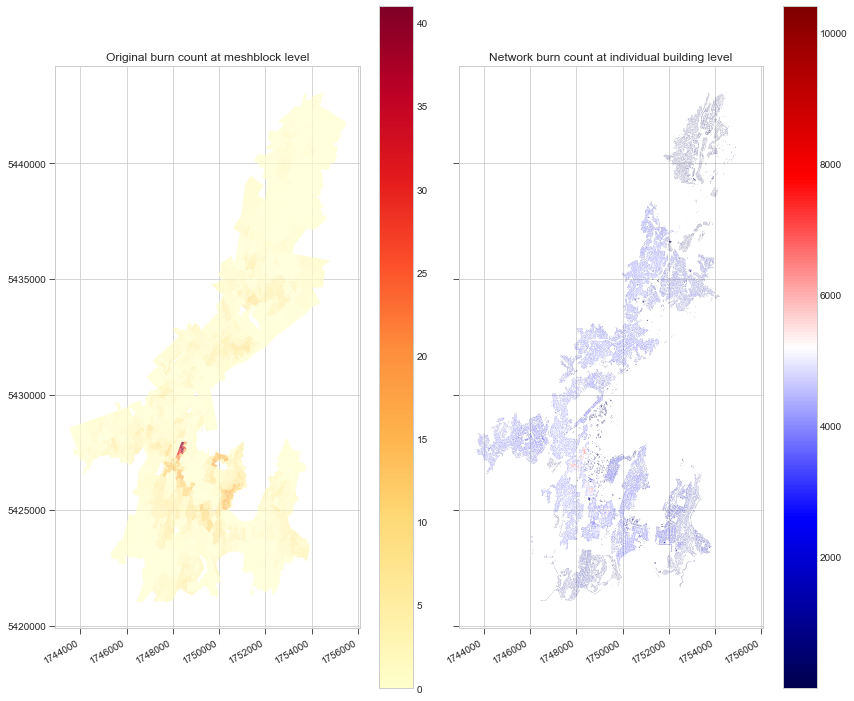

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
# import contextily as ctx
%matplotlib inline
plt.style.use('seaborn-whitegrid')

FinnMeshblockShape = gpd.read_file(pathShapefile / 'Finn_MeshBlockSummary.shp')
countShape = gpd.read_file(pathShapefile / 'Burn3000scenarioWellington.shp')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 10))

FinnMeshblockShape.plot(ax=ax1, column='WellWHV_Bu', cmap='YlOrRd', alpha=0.7, legend=True)
# ctx.add_basemap(ax1, crs=2193)
countShape.plot(ax=ax2, column='count', cmap='seismic', alpha=0.7, legend=True)
# ctx.add_basemap(ax2, crs=2193)

ax1.set_title('Original burn count at meshblock level')
ax1.ticklabel_format(useOffset=False, style='plain')
ax2.set_title('Network burn count at individual building level')
ax2.ticklabel_format(useOffset=False, style='plain')
ax1.tick_params(direction='out', length=6)
ax2.tick_params(direction="out", length=6)

fig.autofmt_xdate()
plt.tight_layout()
plt.savefig(pathShapefile / 'ComparisonGISvsNetwork_3000Burn.png', dpi=600)
plt.show()